# Minesweeper Bot Analysis
Primarily an analysis of my probabilistic strategy.

Data collection overview:
- 9x9 grid, varying the number of mines from 0 to 81. 
- 1000 trials per distinct density (so 82000 games simulated).

Insights:
1. Runtime by density
2. Win rate by density
3. Turns taken to win by density
    - How many tiles are cleared?
4. Turns taken to lose by density
    - How many tiles are cleared?
    - How many tiles are left?

Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read data

In [2]:
df = pd.read_csv("../data/test.csv")
df

,numRows,numColumns,initialDensity,numMines,status,numMoves,numTilesCleared,elapsedMillis
0,9,9,0.0,0,WIN,1,81,7
1,9,9,0.0,0,WIN,1,81,0
2,9,9,0.0,0,WIN,1,81,1
3,9,9,0.0,0,WIN,1,81,1
4,9,9,0.0,0,WIN,1,81,1
...,...,...,...,...,...,...,...,...
81995,9,9,1.0,81,LOSE,1,0,1
81996,9,9,1.0,81,LOSE,1,0,0
81997,9,9,1.0,81,LOSE,1,0,0
81998,9,9,1.0,81,LOSE,1,0,0


### 1. Win rate

In [3]:
def win_rate(group):
    return pd.Series({"winRate": len(group[group["status"] == "WIN"]) / len(group["status"])})

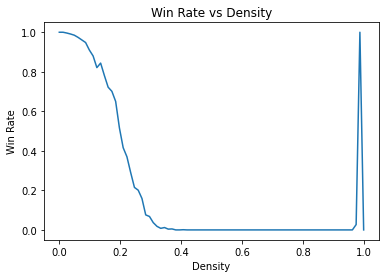

In [4]:
winrate_df = df.groupby(["initialDensity"]).apply(lambda x : win_rate(x))["winRate"].reset_index()
plt.plot(winrate_df["initialDensity"], winrate_df["winRate"])
plt.xlabel("Density")
plt.ylabel("Win Rate")
plt.title("Win Rate vs Density")
plt.show()

There is a spike at numMines = 80 because we are guaranteed to start on a non-mine, and this is the only non-mine there is.

Recall: 
- $\rho_\text{easy} = 0.1234567901$.
- $\rho_\text{medium} = 0.15625$.
- $\rho_\text{hard} = 0.20625$.
- $\rho_\text{expert} = 0.25$.

We can use the 9x9 board to approximate the win rates of the probabilistic algorithm for the different difficulty games

In [5]:
def in_density_range(density, epsilon):
    return winrate_df[(winrate_df["initialDensity"] >= (density - epsilon)) & (winrate_df["initialDensity"] <= (density + epsilon))]

In [39]:
epsilon = 0.005
print(in_density_range(0.1234567901, epsilon))
print(in_density_range(0.15625, epsilon))
print(in_density_range(0.20625, epsilon))
print(in_density_range(0.25, epsilon))

    initialDensity  winRate
10        0.123457    0.821
    initialDensity  winRate
13        0.160494    0.722
    initialDensity  winRate
17        0.209877    0.416
    initialDensity  winRate
20        0.246914    0.215


By trial and error, we find that 0.37 is the highest (not # total tiles - 1) density which the bot can win

In [45]:
print(in_density_range(0.37, epsilon))

    initialDensity  winRate
30         0.37037    0.005


### Runtime

In [19]:
mean_runtime_series = df.groupby(["initialDensity"]).mean("elapsedMillis")["elapsedMillis"]
mean_runtime_series.max()

14.228

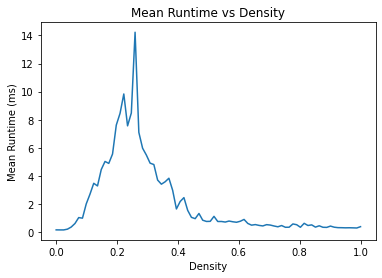

In [20]:
plt.plot(mean_runtime_series)
plt.xlabel("Density")
plt.ylabel("Mean Runtime (ms)")
plt.title("Mean Runtime vs Density")
plt.show()

In [21]:
winners = df[df["status"] == "WIN"]
winners

,numRows,numColumns,initialDensity,numMines,status,numMoves,numTilesCleared,elapsedMillis
0,9,9,0.000000,0,WIN,1,81,7
1,9,9,0.000000,0,WIN,1,81,0
2,9,9,0.000000,0,WIN,1,81,1
3,9,9,0.000000,0,WIN,1,81,1
4,9,9,0.000000,0,WIN,1,81,1
...,...,...,...,...,...,...,...,...
80995,9,9,0.987654,80,WIN,1,1,0
80996,9,9,0.987654,80,WIN,1,1,0
80997,9,9,0.987654,80,WIN,1,1,0
80998,9,9,0.987654,80,WIN,1,1,0
